In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

In [2]:
# Create a sample dataset (you can replace this with your own data)
data = pd.DataFrame({
    'Longitude': np.random.uniform(low=-180, high=180, size=100),
    'Latitude': np.random.uniform(low=-90, high=90, size=100)
})

In [3]:
# Apply Isolation Forest for anomaly detection
isolation_forest = IsolationForest(contamination=0.05)  # Adjust contamination as needed
data['Anomaly'] = isolation_forest.fit_predict(data[['Longitude', 'Latitude']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [4]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Choose the number of components
reduced_features = pca.fit_transform(data[['Longitude', 'Latitude']])

In [5]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Cluster'] = kmeans.fit_predict(reduced_features)

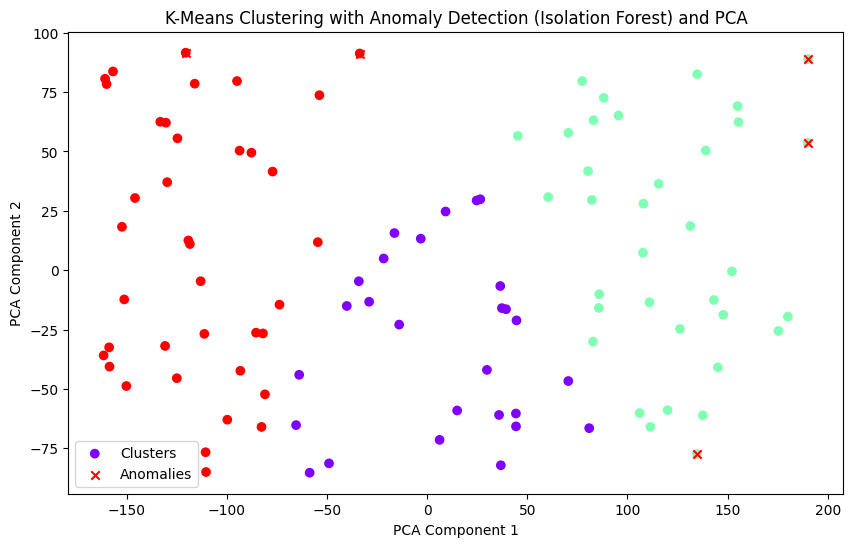

In [6]:
# Visualize the clusters and anomalies
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=data['Cluster'], cmap='rainbow', label='Clusters')
plt.scatter(reduced_features[data['Anomaly'] == -1, 0], reduced_features[data['Anomaly'] == -1, 1],
            c='red', marker='x', label='Anomalies')
plt.title('K-Means Clustering with Anomaly Detection (Isolation Forest) and PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()